In [2]:
#importamos las librerias
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import skew
import scipy.stats as st

In [3]:
df = pd.read_csv("Datos/FIFA World Cup.csv")

In [4]:
df.head(2)

,Year,Hosts,Venues/Cities,Totalattendance †,Matches,Averageattendance,highest attendence of Number,highest attendence of Venue,highest attendence of Game(s)
0,1930,Uruguay,3/1,"590,549",18,"32,808","93,000","Estadio Centenario, Montevideo","Uruguay 6–1 Yugoslavia, Semi-final"
1,1934,Italy,8/8,"363,000",17,"21,353","55,000","Stadio Nazionale PNF, Rome","Italy 2–1 Czechoslovakia, Final"


In [5]:
df.columns

Index(['Year', 'Hosts', 'Venues/Cities', 'Totalattendance †', 'Matches',
       'Averageattendance', 'highest attendence of Number',
       'highest attendence of Venue', 'highest attendence of Game(s)'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Year                           21 non-null     int64 
 1   Hosts                          21 non-null     object
 2   Venues/Cities                  21 non-null     object
 3   Totalattendance †              21 non-null     object
 4   Matches                        21 non-null     int64 
 5   Averageattendance              21 non-null     object
 6   highest attendence of Number   21 non-null     object
 7   highest attendence of Venue    21 non-null     object
 8   highest attendence of Game(s)  21 non-null     object
dtypes: int64(2), object(7)
memory usage: 1.6+ KB


In [7]:
print(f"Nuestro DF tiene {df.shape[0]} filas  y {df.shape[1]} columnas")

Nuestro DF tiene 21 filas  y 9 columnas


In [8]:
print("El número de nulos de nuestro DataFrame es:")
df.isnull().sum()

El número de nulos de nuestro DataFrame es:


Year                             0
Hosts                            0
Venues/Cities                    0
Totalattendance †                0
Matches                          0
Averageattendance                0
highest attendence of Number     0
highest attendence of Venue      0
highest attendence of Game(s)    0
dtype: int64

In [9]:
print("El número de duplicados de nuestro DataFrame es:")
df.duplicated().sum()

El número de duplicados de nuestro DataFrame es:


0

In [10]:
print("Los tipos de datos de nuestro DataFrame son:")
df.dtypes

Los tipos de datos de nuestro DataFrame son:


Year                              int64
Hosts                            object
Venues/Cities                    object
Totalattendance †                object
Matches                           int64
Averageattendance                object
highest attendence of Number     object
highest attendence of Venue      object
highest attendence of Game(s)    object
dtype: object

Para poder trabajar con ellos, y considerando que nos hablan del número de personas, vamos a crear una columna nueva cambiando el tipo de valor de "Totalattendance", a integer, ya que nos habla del número de asistentes

In [11]:
# Creamos una función para quitar las comas de los datos
def quitar_comas(val):
    return val.replace(",","")

In [12]:
# Creamos una nueva columna aplicandole la función quitar comas
df["Asistencia_Total"] = df['Totalattendance †'].apply(quitar_comas)

In [13]:
df.head()

,Year,Hosts,Venues/Cities,Totalattendance †,Matches,Averageattendance,highest attendence of Number,highest attendence of Venue,highest attendence of Game(s),Asistencia_Total
0,1930,Uruguay,3/1,"590,549",18,"32,808","93,000","Estadio Centenario, Montevideo","Uruguay 6–1 Yugoslavia, Semi-final",590549
1,1934,Italy,8/8,"363,000",17,"21,353","55,000","Stadio Nazionale PNF, Rome","Italy 2–1 Czechoslovakia, Final",363000
2,1938,France,10/9,"375,700",18,"20,872","58,455","Olympique de Colombes, Paris","France 1–3 Italy, Quarter-final",375700
3,1950,Brazil,6/6,"1,045,246",22,"47,511","173,850[86]","Maracanã Stadium, Rio de Janeiro","Brazil 1–2 Uruguay, Deciding match",1045246
4,1954,Switzerland,6/6,"768,607",26,"29,562","63,000","Wankdorf Stadium, Bern","West Germany 3–2 Hungary, Final",768607


In [14]:
# Modificamos el tipo de dato de la columna nueva
df["Asistencia_Total"] = df["Asistencia_Total"].astype(int)

In [15]:
df.dtypes

Year                              int64
Hosts                            object
Venues/Cities                    object
Totalattendance †                object
Matches                           int64
Averageattendance                object
highest attendence of Number     object
highest attendence of Venue      object
highest attendence of Game(s)    object
Asistencia_Total                  int64
dtype: object

In [16]:
print("Estas son los valores únicos y sus frecuencias de la columna Year")
df["Year"].value_counts()

Estas son los valores únicos y sus frecuencias de la columna Year


1930    1
1982    1
2014    1
2010    1
2006    1
2002    1
1998    1
1994    1
1990    1
1986    1
1978    1
1934    1
1974    1
1970    1
1966    1
1962    1
1958    1
1954    1
1950    1
1938    1
2018    1
Name: Year, dtype: int64

In [17]:
print("Estas son los valores únicos y sus frecuencias de la columna Hosts")
df["Hosts"].value_counts()

Estas son los valores únicos y sus frecuencias de la columna Hosts


 Mexico               2
 France               2
 Brazil               2
 Italy                2
 Argentina            1
 South Africa         1
 Germany              1
 South Korea Japan    1
 United States        1
 Spain                1
 Uruguay              1
 West Germany         1
 England              1
 Chile                1
 Sweden               1
 Switzerland          1
 Russia               1
Name: Hosts, dtype: int64

In [18]:
print("Estas son los valores únicos y sus frecuencias de la columna Venues/Cities")
df["Venues/Cities"].value_counts()

Estas son los valores únicos y sus frecuencias de la columna Venues/Cities


12/12    4
10/9     2
6/6      2
9/9      2
12/11    2
3/1      1
8/8      1
4/4      1
8/7      1
5/5      1
6/5      1
17/14    1
10/10    1
20/20    1
Name: Venues/Cities, dtype: int64

In [19]:
print("Estas son los valores únicos y sus frecuencias de la columna Totalattendance †")
df["Totalattendance †"].value_counts()

Estas son los valores únicos y sus frecuencias de la columna Totalattendance †


590,549      1
2,109,723    1
3,429,873    1
3,178,856    1
3,359,439    1
2,705,197    1
2,785,100    1
3,587,538    1
2,516,215    1
2,394,031    1
1,545,791    1
363,000      1
1,865,753    1
1,603,975    1
1,563,135    1
893,172      1
819,810      1
768,607      1
1,045,246    1
375,700      1
3,031,768    1
Name: Totalattendance †, dtype: int64

In [20]:
print("Estas son los valores únicos y sus frecuencias de la columna Matches")
df["Matches"].value_counts()

Estas son los valores únicos y sus frecuencias de la columna Matches


64    6
52    4
32    3
18    2
38    2
17    1
22    1
26    1
35    1
Name: Matches, dtype: int64

In [21]:
print("Estas son los valores únicos y sus frecuencias de la columna Averageattendance")
df["Averageattendance"].value_counts()

Estas son los valores únicos y sus frecuencias de la columna Averageattendance


32,808    1
40,572    1
53,592    1
49,670    1
52,491    1
42,269    1
43,517    1
68,991    1
48,389    1
46,039    1
40,679    1
21,353    1
49,099    1
50,124    1
48,848    1
27,912    1
23,423    1
29,562    1
47,511    1
20,872    1
47,371    1
Name: Averageattendance, dtype: int64

In [22]:
print("Estas son los valores únicos y sus frecuencias de la columna highest attendence of Number")
df["highest attendence of Number"].value_counts()

Estas son los valores únicos y sus frecuencias de la columna highest attendence of Number


93,000         1
95,500         1
74,738         1
84,490         1
72,000         1
69,029         1
80,000         1
94,194         1
74,765         1
114,600        1
71,712         1
55,000         1
83,168         1
108,192        1
98,270         1
68,679         1
50,928         1
63,000         1
173,850[86]    1
58,455         1
78,011         1
Name: highest attendence of Number, dtype: int64

In [23]:
print("Estas son los valores únicos y sus frecuencias de la columna highest attendence of Game(s)")
df["highest attendence of Game(s)"].value_counts()

Estas son los valores únicos y sus frecuencias de la columna highest attendence of Game(s)


Uruguay 6–1 Yugoslavia, Semi-final                                   1
Argentina 0–1 Belgium, Opening match                                 1
Germany 1–0 Argentina, Final                                         1
Spain 1–0 Netherlands, Final                                         1
Germany 1–1 (4–2p) Argentina, Quarter-final                          1
Brazil 2–0 Germany, Final                                            1
Brazil 0–3 France, Final                                             1
Brazil 0–0 (3–2p) Italy, Final                                       1
West Germany 4–1 Yugoslavia, Group stage                             1
Mexico 1–1 Paraguay, Group stageArgentina 3–2 West Germany, Final    1
Italy 1–0 Argentina, Group stage                                     1
Italy 2–1 Czechoslovakia, Final                                      1
West Germany 1–0 Chile, Group stage                                  1
Mexico 1–0 Belgium, Group stage                                      1
Englan

In [24]:
print("Estos son los principales estadísticos del DataFrame, para las columnas numéricas")
df.describe().T

Estos son los principales estadísticos del DataFrame, para las columnas numéricas


,count,mean,std,min,25%,50%,75%,max
Year,21.0,1.976857e+03,2.665762e+01,1930.0,1958.0,1978.0,1998.0,2018.0
Matches,21.0,4.285714e+01,1.746793e+01,17.0,32.0,38.0,64.0,64.0
Asistencia_Total,21.0,1.930118e+06,1.077834e+06,363000.0,893172.0,1865753.0,2785100.0,3587538.0


In [25]:
print("Estos son los principales estadísticos del DataFrame, para las columnas categóricas")
df.describe(include="object").T

Estos son los principales estadísticos del DataFrame, para las columnas categóricas


,count,unique,top,freq
Hosts,21,17,Mexico,2
Venues/Cities,21,14,12/12,4
Totalattendance †,21,21,"590,549",1
Averageattendance,21,21,"32,808",1
highest attendence of Number,21,21,"93,000",1
highest attendence of Venue,21,19,"Maracanã Stadium, Rio de Janeiro",2
highest attendence of Game(s),21,21,"Uruguay 6–1 Yugoslavia, Semi-final",1


## EJERCICIO

Planteamos una serie de preguntas sobre el DF

1. ¿Algún pais ha sido anfitrión más de una vez?

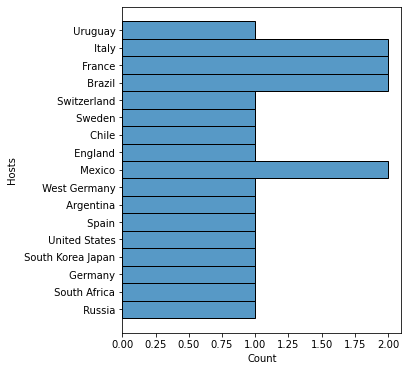

In [26]:
plt.figure(figsize=(5,6))
sns.histplot(y="Hosts", data= df);

Hacemos un histplot, en el que vemos que Italia, Francia, Brasil y México son los únicos paises que han repetido

2. ¿Que mundial ha tenido más publico?

In [27]:
maximo = df[df["Asistencia_Total"] == df["Asistencia_Total"].max()]
maximo

,Year,Hosts,Venues/Cities,Totalattendance †,Matches,Averageattendance,highest attendence of Number,highest attendence of Venue,highest attendence of Game(s),Asistencia_Total
14,1994,United States,9/9,"3,587,538",52,"68,991","94,194","Rose Bowl, Pasadena, California","Brazil 0–0 (3–2p) Italy, Final",3587538


El mundial que más asistencia ha tenido es el de USA en 1994

3. Evolución del número de partidos en los diferentes mundiales a lo largo del tiempo

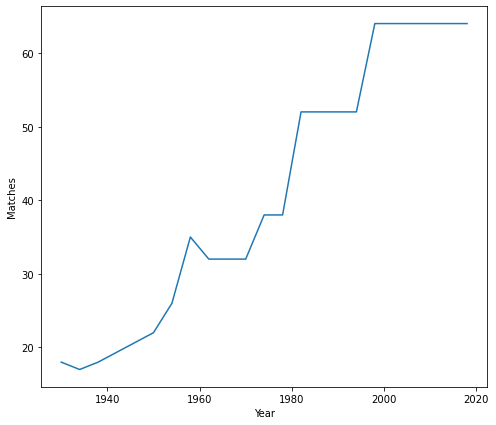

In [28]:
plt.figure(figsize=(8,7))
sns.lineplot(y="Matches", data= df, x= "Year");

Vemos que ha ido aumentando con los años, y se ha estancado desde el año 2000

4. Creamos un boxplot para ver las estadísticas de la asistencia a los mundiales

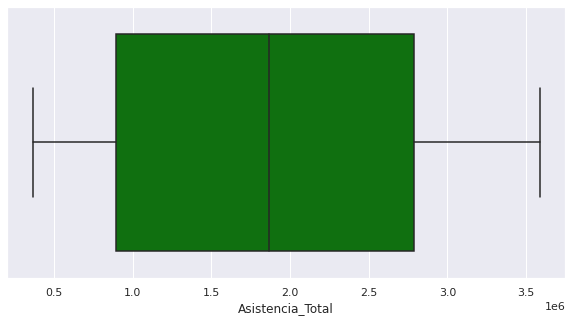

In [30]:
plt.figure(figsize= (10,5))
sns.set(style= "darkgrid")

sns.boxplot(data= df, x= "Asistencia_Total", color= "green");

Podemos ver que no tenemos ningún outlier. La mediana está cerca de 1.9 millones de personas, que corresponden a Q2. Q1 está mas o menos en 0.9 millones de personas, y y Q3 en 2.8 millones. El rango intercuartílico va entre 0.9 y 2.8, que es donde tenemos la mayoría de los registros.